In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab임시폴더/mnist/train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 데이터 전처리
# 결측치, 이상치, 정규화, feature engineering

# 우리예제는 결측치, 이상치가 없어요!
# 대신 정규화는 필요해요!

# train data와 test data를 분리할 필요가 있어요!
# 학습을 하기 위한 train data
# 이 train data는 학습을 위한 train data와 validation data로 분리

# 마지막 평가를 하기 위해 딱 1번 사용되는 test data
# 이 두개로 분리해야 해요!
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

scaler = MinMaxScaler()
scaler.fit(train_x_data)
norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# t_data에 대한 one-hot encoding처리는 하지 않아도 되요! (keras설정을 잡아서 이용)


In [4]:
# Keras 구현
# model 구현
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='valid',
                 strides=(1,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='valid',
                 strides=(1,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='valid',
                 strides=(1,1)))

model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [5]:
#  model 실행 옵션
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# model 학습

# norm_train_x_data 이 학습 데이터의 일부를 validation data로 활용해서
# 학습이 진행될 때(epoch마다) 평가를 같이 진행!
# 평가는 train data에 대한 loss, accuracy, valid data에 대한 loss, accuracy
history = model.fit(norm_train_x_data.reshape(-1,28,28,1),
                    train_t_data,
                    epochs=200,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/200
206/206 [==============================] - 3s 6ms/step - loss: 0.4748 - accuracy: 0.8514 - val_loss: 0.1348 - val_accuracy: 0.9593
Epoch 2/200
206/206 [==============================] - 1s 4ms/step - loss: 0.1372 - accuracy: 0.9583 - val_loss: 0.0842 - val_accuracy: 0.9730
Epoch 3/200
206/206 [==============================] - 1s 4ms/step - loss: 0.0951 - accuracy: 0.9700 - val_loss: 0.0657 - val_accuracy: 0.9796
Epoch 4/200
206/206 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9743 - val_loss: 0.0601 - val_accuracy: 0.9804
Epoch 5/200
206/206 [==============================] - 1s 4ms/step - loss: 0.0643 - accuracy: 0.9792 - val_loss: 0.0553 - val_accuracy: 0.9827
Epoch 6/200
206/206 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9815 - val_loss: 0.0483 - val_accuracy: 0.9861
Epoch 7/200
206/206 [==============================] - 1s 4ms/step - loss: 0.0480 - accuracy: 0.9841 - val_loss: 0.0472 - val_accuracy: 0.9861

<class 'keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


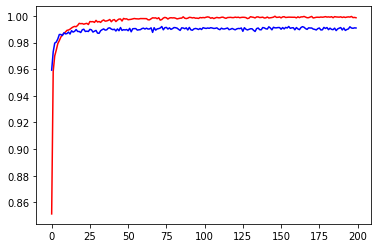

In [11]:
print(type(history))   # <class 'keras.callbacks.History'>
print(history.history.keys())  # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [7]:
# 이렇게 학습된 model 자체를 저장할 수 있어요!
# 모델의 구조 + 계산된 모든 weight, bias를 하나의 파일에 저장할 수 있어요!
# 확장자는 .h5 (HDF5) 형식

model.save('/content/drive/MyDrive/Colab임시폴더/mnist_model_save/my_mnist_model.h5')

In [ ]:
# model을 이용한 evaluation(평가)
model.evaluate(norm_test_x_data.reshape(-1,28,28,1), test_t_data)
#        loss                 accuracy 
# [0.09250600636005402, 0.9903967976570129]

In [ ]:
# 저장된 모델을 불러와서 
# 성능평가를 진행해보아요!
from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/Colab임시폴더/mnist_model_save/my_mnist_model.h5')

# model을 이용한 evaluation(평가)
new_model.evaluate(norm_test_x_data.reshape(-1,28,28,1), test_t_data)
#        loss                 accuracy 
# [0.09250600636005402, 0.9903967976570129]


In [ ]:
# model 학습(ckpt, earlyStopping callback 포함)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# checkpoint 설정
checkpoint_path = '/content/drive/MyDrive/Colab임시폴더/mnist_model_save/cp-{epoch:04d}.ckpt'
cp_callback = ModelCheckpoint(checkpoint_path,
                              save_weights_only=True,
                              period=5,
                              verbose=1)

# earlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0.001,   # 생략하면 값이 떨어지면 유효한것을 판단.
                   patience=5,
                   verbose=1,
                   mode='auto',
                   restore_best_weights=True)

# norm_train_x_data 이 학습 데이터의 일부를 validation data로 활용해서
# 학습이 진행될 때(epoch마다) 평가를 같이 진행!
# 평가는 train data에 대한 loss, accuracy, valid data에 대한 loss, accuracy
history = model.fit(norm_train_x_data.reshape(-1,28,28,1),
                    train_t_data,
                    epochs=50,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3,
                    callbacks=[cp_callback, es])